# Supermarket Sales Prediction


# 1. Defining the Question

# a) Specifying the Question

> Building a supervised machine learning algorithm to predict sales.

# b) Defining the Metrics for Success¶

> Building a machine learning algorithm with the lowest RMSE.

# c) Understanding the context

ProductID : unique product ID

Weight : weight of products

FatContent : specifies whether the product is low on fat or not

Visibility : percentage of total display area of all products in a store allocated to the particular product

ProductType : the category to which the product belongs

MRP : Maximum Retail Price (listed price) of the products

OutletID : unique store ID

EstablishmentYear : year of establishment of the outlets

OutletSize : the size of the store in terms of ground area covered

LocationType : the type of city in which the store is located

OutletType : specifies whether the outlet is just a grocery store or some sort of supermarket

OutletSales : (target variable) sales of the product in the particular store

# d) Recording the Experimental Design

> 1. Problem Definition

> 2. Data Sourcing

> 3. Check the Data

> 4. Perform Data Cleaning

> 5. Perform Exploratory Data Analysis (Univariate, Bivariate & Multivariate)

> 6. Implement the Solution

> 7. Challenge the Solution

> 8. Follow up Questions

> 9. Conclusions

> 10. Recommendations

# 2. Importing Libraries

In [1]:
# Lets import relevant libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 3. Data Wrangling
## a) Gathering Data

In [2]:
# Lets create a function that reads data

def read(data):
    return pd.read_csv(data)

In [3]:
# Lets read the  train dataset

sales_traindf = read('train.csv')
sales_traindf.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3382,FDP10,19.000,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
1641,FDB59,18.250,Low Fat,0.015303,Snack Foods,198.0084,OUT049,1999,Medium,Tier 1,Supermarket Type1,793.6336
2973,FDW12,8.315,reg,0.035627,Baking Goods,146.6444,OUT049,1999,Medium,Tier 1,Supermarket Type1,870.8664
6766,NCD31,12.100,LF,0.015497,Household,165.5526,OUT018,2009,Medium,Tier 3,Supermarket Type2,3453.5046
4072,FDF41,12.150,Low Fat,0.131922,Frozen Foods,246.3460,OUT017,2007,NaN,Tier 2,Supermarket Type1,739.0380


In [4]:
# Lets preview a sample of the dataset
sales_testdf = read('test.csv')
sales_testdf.sample(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5658,FDL45,15.60,Low Fat,0.037656,Snack Foods,123.4704,OUT013,1987,High,Tier 3,Supermarket Type1
2176,NCE55,8.92,Low Fat,0.129928,Household,175.7370,OUT046,1997,Small,Tier 1,Supermarket Type1
3955,DRI13,15.35,Low Fat,0.020323,Soft Drinks,217.6508,OUT035,2004,Small,Tier 2,Supermarket Type1
4652,FDC53,8.68,Low Fat,0.008849,Frozen Foods,99.9384,OUT049,1999,Medium,Tier 1,Supermarket Type1
169,FDK26,5.46,Regular,0.053858,Canned,186.9240,OUT010,1998,NaN,Tier 3,Grocery Store


## b) Assessing Data

In [5]:
# Lets preview the shape of the datasets
print('The train dataset had',sales_traindf.shape,'rows and columns respectively')
print('The test dataset had',sales_testdf.shape,'rows and columns respectively')

The train dataset had (8523, 12) rows and columns respectively
The test dataset had (5681, 11) rows and columns respectively


In [6]:
# Lets preview the columns of each dataset since the test dataset seems to have one column less
print(sales_traindf.info())
print('..'*50)
print(sales_testdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
........................................

> The missing column is our target variable which is sales which the machine needs to predict.

> All the columns have correct datatpes

In [7]:
# Lets check for missing values in both the datasets
print('The percentage of missing values in the train data were: ')
print(sales_traindf.isna().sum()/len(sales_traindf)*100)
print('..'*50)
print('The percentage of missing values in the train data were ')
print(sales_testdf.isna().sum()/len(sales_traindf)*100)

The percentage of missing values in the train data were: 
Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64
....................................................................................................
The percentage of missing values in the train data were 
Item_Identifier               0.000000
Item_Weight                  11.451367
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year   

> Two columns in each dataset had missing values. We'll perform some cleaning procedures

In [8]:
print('The percentage of duplicate values in the train data was: ')
print(sales_traindf.duplicated().sum()/len(sales_traindf)*100)
print('..'*50)
print('The percentage of duplicate values in the train data was ')
print(sales_testdf.duplicated().sum()/len(sales_traindf)*100)

The percentage of duplicate values in the train data was: 
0.0
....................................................................................................
The percentage of duplicate values in the train data was 
0.0


In [9]:
# Check Cardinality
# We will use a for loop function to iterate through the columns 
# while checking for the number of unique values in each column.

# Number of unique values in the obesity dataset

def cardinal(data):
    print('Cardinality of the dataset columns : \n')
    for i in data.columns:
        print(f'{i} : {data[i].nunique()}')

print('Train Dataset')
cardinal(sales_traindf)
print('..'*50)
print('Test Dataset')
cardinal(sales_testdf)


Train Dataset
Cardinality of the dataset columns : 

Item_Identifier : 1559
Item_Weight : 415
Item_Fat_Content : 5
Item_Visibility : 7880
Item_Type : 16
Item_MRP : 5938
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4
Item_Outlet_Sales : 3493
....................................................................................................
Test Dataset
Cardinality of the dataset columns : 

Item_Identifier : 1543
Item_Weight : 410
Item_Fat_Content : 5
Item_Visibility : 5277
Item_Type : 16
Item_MRP : 4402
Outlet_Identifier : 10
Outlet_Establishment_Year : 9
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4


In [10]:
print('Fat Content')
print(sales_traindf['Item_Fat_Content'].unique())
print('----------------------------------------------------')
print('Item Type')
print(sales_traindf['Item_Type'].unique())
print('----------------------------------------------------')
print('Outlet Size')
print(sales_traindf['Outlet_Size'].unique())
print('----------------------------------------------------')
print('Outlet location Type')
print(sales_traindf['Outlet_Location_Type'].unique())


Fat Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
----------------------------------------------------
Item Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
----------------------------------------------------
Outlet Size
['Medium' nan 'High' 'Small']
----------------------------------------------------
Outlet location Type
['Tier 1' 'Tier 3' 'Tier 2']


> We realize that the fat content column has some inconsistencies. reg and regular, lowfat and lf

> The same column has some words in caps while others are in lowwer cases.

In [11]:
# Lets check for the summary statistics
print('Train Dataset')
print(sales_traindf.describe())
print('Test Dataset')
print(sales_testdf.describe())

Train Dataset
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
Test Dataset
       Item_Weight

In [12]:
sales_traindf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


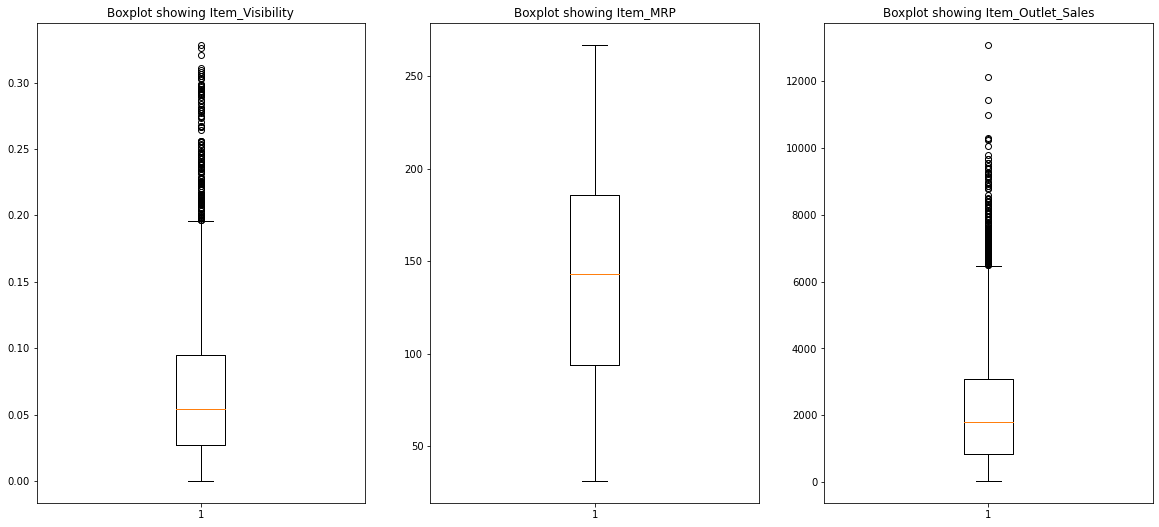

In [13]:
# checking for outliers
# define a function that plots boxplots to visualize outliers

def outliers ():
    "making a dictionary for numerical columns"
    columns_dict = {'Item_Visibility': 1, 'Item_MRP': 2, 'Item_Outlet_Sales': 3}
    plt.figure(figsize=(20,30))
    for variable,i in columns_dict.items():
      plt.subplot(3,3,i);
      plt.boxplot(sales_traindf[variable]);
      plt.title(f"Boxplot showing {variable}");
    plt.show()
outliers()

(a) Some columns have outliers.

(b) We need to assess the outliers.

In [14]:
# Lets preview the outliers of the sales column
sales_traindf.query('Item_Outlet_Sales > 6500')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
130,FDY25,NaN,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,NCR53,NaN,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,FDP16,18.60,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
203,FDI24,NaN,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.20,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8329,NCQ06,NaN,Low Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364
8350,NCE18,10.00,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750
8447,FDS26,20.35,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,NaN,Tier 2,Supermarket Type1,7588.1226


> Outliers shall be retained as they contain pertinent and real information.

## c) Cleaning

> 1. Some columns have missing values. We will need to deal with the missing values.

> 2. The item fat content column had some inconsistencies.

> 3. Lets lower the cases of all columns for easier computation. 

> 4. Lets convertthe datatype of the year column from integer to datetime.

# Issue 1 : 

## Define:

> Remove the missing values since they were a small percentage.

# Code

In [15]:
# Lets drop rows with missing values in each column
sales_traindf.dropna(inplace = True)
sales_testdf.dropna(inplace = True)

# Test

In [16]:
# Lets check for missing values in both the datasets
print('The percentage of missing values in the train data were: ')
print(sales_traindf.isna().sum()/len(sales_traindf)*100)
print('..'*50)
print('The percentage of missing values in the train data were ')
print(sales_testdf.isna().sum()/len(sales_traindf)*100)

The percentage of missing values in the train data were: 
Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64
....................................................................................................
The percentage of missing values in the train data were 
Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: flo

# Issue 2 :

> Lets deal with incosistencies in the fat content column.

# Code

In [17]:
# Lets preview an array of the unique features in te column
sales_traindf.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [18]:
# Lets preview an array of the unique features in te column
sales_testdf.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'LF', 'reg', 'low fat'], dtype=object)

In [19]:
# The train dataset
sales_traindf.Item_Fat_Content.replace({'Low Fat': 'low fat','Regular':'regular','reg':'regular','LF':'low fat'},inplace = True)

In [20]:
# # The test dataset
sales_testdf.Item_Fat_Content.replace({'Low Fat': 'low fat','Regular':'regular','reg':'regular','LF':'low fat'},inplace = True)

# Test

In [21]:
# Lets preview the rows again
print(sales_traindf.Item_Fat_Content.unique())
print('..'*20)
print(sales_testdf.Item_Fat_Content.unique())

['low fat' 'regular']
........................................
['low fat' 'regular']


# Issue 3 :

> Lets lower the cases of all columns for easier computation.

# Code

In [22]:
# lets preview the columns
sales_traindf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [23]:
# Lets rename the columns of all rows
# We'll use the lambda funtion to strip off white spaces

sales_traindf.rename(columns = lambda x : x.lower(),inplace =True)

sales_testdf.rename(columns = lambda x : x.lower(),inplace =True)



# Test

In [24]:
# Lets preview the columns
sales_traindf.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

In [25]:
sales_testdf.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type'],
      dtype='object')

# Issue 4:

> Lets convert the datatype of the year column from integer to datetime.

# Code

In [26]:
# Lets convert the data type 
sales_traindf['outlet_establishment_year']= pd.to_datetime(sales_traindf['outlet_establishment_year'])
sales_testdf['outlet_establishment_year']= pd.to_datetime(sales_testdf['outlet_establishment_year'])

# Test

In [27]:
print(sales_traindf.dtypes)
print('..'*40)
print(sales_testdf.dtypes)

item_identifier                      object
item_weight                         float64
item_fat_content                     object
item_visibility                     float64
item_type                            object
item_mrp                            float64
outlet_identifier                    object
outlet_establishment_year    datetime64[ns]
outlet_size                          object
outlet_location_type                 object
outlet_type                          object
item_outlet_sales                   float64
dtype: object
................................................................................
item_identifier                      object
item_weight                         float64
item_fat_content                     object
item_visibility                     float64
item_type                            object
item_mrp                            float64
outlet_identifier                    object
outlet_establishment_year    datetime64[ns]
outlet_size              

# 4. Exploratory Data Analysis

## (a) Univariate Analysis

In [28]:
sales_traindf.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,low fat,0.000000,Household,53.8614,OUT013,1970-01-01 00:00:00.000001987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,regular,0.000000,Baking Goods,51.4008,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,556.6088


<Figure size 1000x300 with 0 Axes>

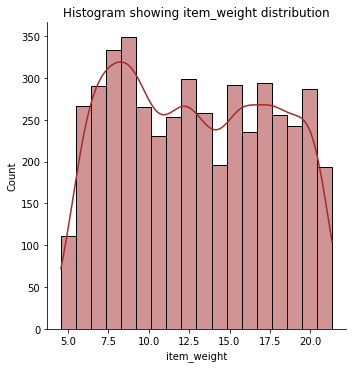

<Figure size 1000x300 with 0 Axes>

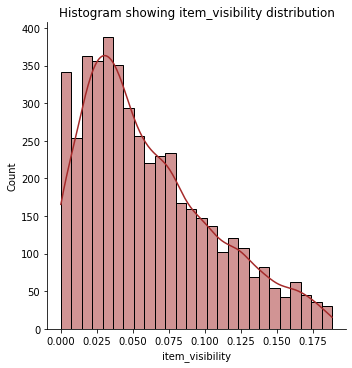

<Figure size 1000x300 with 0 Axes>

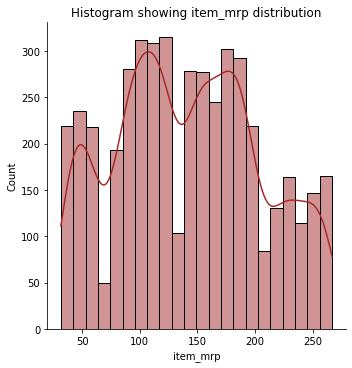

<Figure size 1000x300 with 0 Axes>

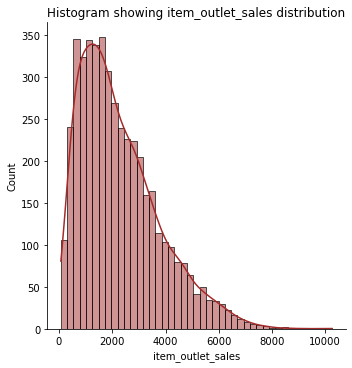

In [29]:
#Plotting histrograms for categorical values
# columns_dict = ['unit_price','tax','cogs','gross_income','total']

def histogram (v):
    columns_dict = ['item_weight','item_visibility','item_mrp','item_outlet_sales']
    for i in columns_dict:
      plt.figure(figsize = (10,3), dpi=100)
      sns.displot(v[i], kde = True, color = 'brown')
      plt.title(f"Histogram showing {i} distribution", color = 'Black')
      plt.show()

histogram (sales_traindf);

In [30]:
# Lets check for the value counts of the outlet_size
sales_traindf['outlet_size'].value_counts()

Small     1860
Medium    1858
High       932
Name: outlet_size, dtype: int64

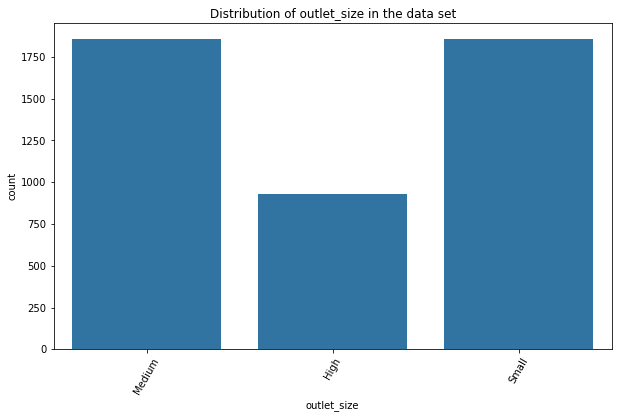

In [31]:
# Lets plot a countplot for the column

base_color = sns.color_palette()[0]
plt.figure(figsize=(10,6))
sns.countplot(x = sales_traindf['outlet_size'],color = base_color)
plt.xticks(rotation=60);
plt.title('Distribution of outlet_size in the data set');

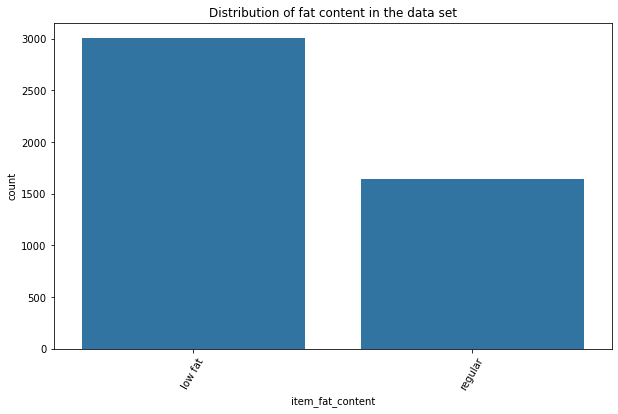

In [32]:
# Lets plot a countplot for the column

base_color = sns.color_palette()[0]
plt.figure(figsize=(10,6))
sns.countplot(x = sales_traindf['item_fat_content'],color = base_color)
plt.xticks(rotation=60);
plt.title('Distribution of fat content in the data set');

In [33]:
sales_traindf.outlet_type.value_counts()

Supermarket Type1    3722
Supermarket Type2     928
Name: outlet_type, dtype: int64

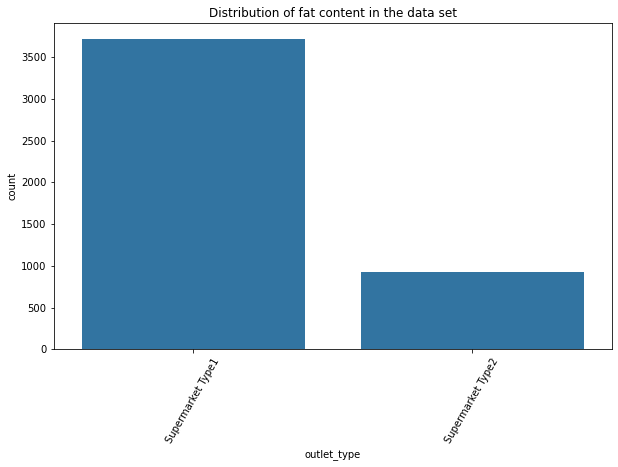

In [34]:
# Lets plot a countplot for the column

base_color = sns.color_palette()[0]
plt.figure(figsize=(10,6))
sns.countplot(x = sales_traindf['outlet_type'],color = base_color)
plt.xticks(rotation=60);
plt.title('Distribution of fat content in the data set');

## Bivariate Analysis

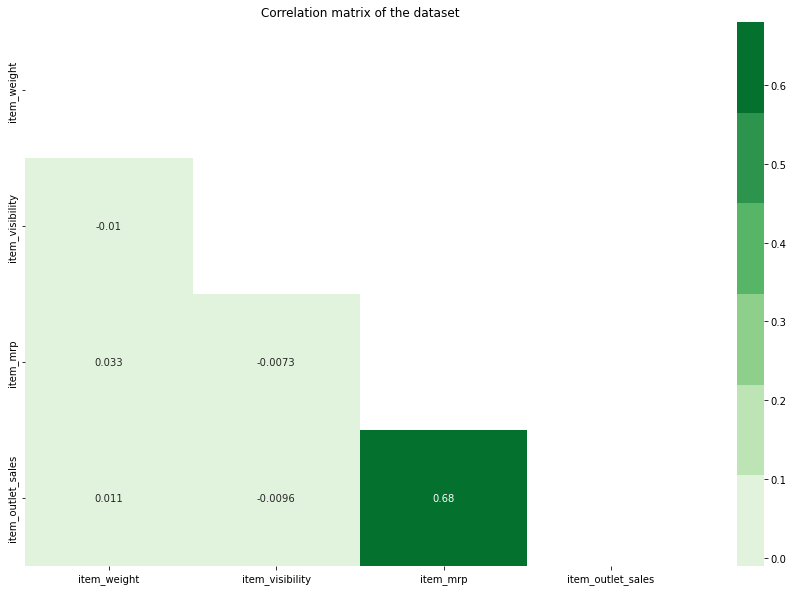

In [35]:
## Plotting a correlation matrix

def Cormatrix (h):
      plt.subplots(figsize=(15,10))
      mask = np.triu(np.ones_like(h.corr()))
      colormap = sns.color_palette("Greens")
      dataplot = sns.heatmap(h.corr(), cmap=colormap, annot=True, mask=mask)
      dataplot.set_title("Correlation matrix of the dataset")
      plt.show()

Cormatrix (sales_traindf)

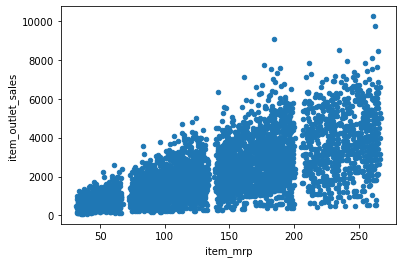

In [36]:
# Lets plot scatter plots of the highly correlated features 

ax = sales_traindf.plot.scatter(x="item_mrp", y="item_outlet_sales")

In [37]:
sales_traindf.head(3)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,2097.2700


# Pre-processing

## (a) Label Encoding

In [38]:
# Preview a sample
sales_traindf.sample(2)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
2698,DRE13,6.28,low fat,0.027748,Soft Drinks,86.5198,OUT049,1970-01-01 00:00:00.000001999,Medium,Tier 1,Supermarket Type1,1395.5168
119,FDY58,11.65,low fat,0.040081,Snack Foods,227.0694,OUT018,1970-01-01 00:00:00.000002009,Medium,Tier 3,Supermarket Type2,1141.8470


In [39]:
# Lets label encode
le = LabelEncoder()

objects = [col for col in sales_traindf.columns if sales_traindf[col].dtype == 'object']
objects

['item_identifier',
 'item_fat_content',
 'item_type',
 'outlet_identifier',
 'outlet_size',
 'outlet_location_type',
 'outlet_type']

In [40]:
# Lets label encode categorical varibles
categorical = ['item_fat_content','item_type','outlet_size','outlet_location_type','outlet_type']

for col in categorical :
    sales_traindf[col] = le.fit_transform(sales_traindf[col])

In [41]:
# Preview a sample
sales_traindf.head(3)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1970-01-01 00:00:00.000001999,1,0,0,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,1970-01-01 00:00:00.000002009,1,2,1,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1970-01-01 00:00:00.000001999,1,0,0,2097.2700


## Splitting the dataset


In [42]:
# Linear regression
X = sales_traindf.drop(['item_identifier','outlet_identifier','item_outlet_sales','outlet_establishment_year'],1)
y = sales_traindf['item_outlet_sales']

In [43]:
# Crafting of the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=101, test_size=0.2)

## Standardization

In [44]:
# Lets use standardization 
sc= StandardScaler()

sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 0.5756752 , -0.73900924,  1.84835355, ..., -0.26809708,
         1.1249453 ,  2.00843957],
       [ 1.03357788,  1.35316305,  2.14114477, ...,  1.07058899,
        -1.10635116, -0.49789897],
       [ 0.09647473, -0.73900924, -0.63465873, ..., -0.26809708,
        -1.10635116, -0.49789897],
       ...,
       [ 1.42758715, -0.73900924, -0.59626072, ..., -0.26809708,
        -1.10635116, -0.49789897],
       [ 0.92708888,  1.35316305,  1.43648482, ...,  1.07058899,
         0.00929707, -0.49789897],
       [ 0.94838668, -0.73900924, -0.89465211, ...,  1.07058899,
        -1.10635116, -0.49789897]])

# Modeling

## Base Model :

### Decision Tree Regressor

In [45]:
# Decision Tree 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=25)

In [46]:
# Building the model

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 10,min_samples_split = 2)

# Fitting the model

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=10)

In [47]:
# Predict based on the model we've trained
y_preddt = model.predict(X_test)

# creating a dataframe of the predicted and actuals
comparison_framedt = pd.DataFrame({'Actual': y_test, 'Predicted': y_preddt})
comparison_framedt.head(5)

,Actual,Predicted
5785,1584.6040,3038.7112
3415,1566.6274,1478.0760
1793,194.4136,972.0680
2701,2465.4574,2036.6822
7118,7190.6400,3046.7008


In [48]:
# Summary statistics of the dataframe
comparison_framedt.describe()

,Actual,Predicted
count,1395.000000,1395.000000
mean,2234.214321,2276.672793
std,1489.723391,1540.028733
min,69.243200,75.901200
25%,1100.567400,1066.611600
50%,1895.532600,1869.566400
75%,3103.959600,3147.902400
max,9069.527600,9779.936200


#### Lets now evaluate our model
model.score(X_test, y_test)

In [49]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_preddt))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_preddt))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_preddt)))

Mean Absolute Error: 1170.646310250896
Mean Squared Error: 2567845.8392048464
Root Mean Squared Error: 1602.4499490482835


# Challenging the Base Model.

## Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Building the model
forest = RandomForestRegressor()

# Lets fit the model to our dataset
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

# Creating a dataframe of the actuals and predicted
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.head(5)

,Actual,Predicted
5785,1584.6040,1930.094278
3415,1566.6274,1992.386526
1793,194.4136,672.544554
2701,2465.4574,1878.534726
7118,7190.6400,4320.089906


In [51]:
# lets investigate the summary statistics of the df
comparison_frame.describe()

,Actual,Predicted
count,1395.000000,1395.000000
mean,2234.214321,2271.164279
std,1489.723391,1106.374291
min,69.243200,230.573198
25%,1100.567400,1381.162152
50%,1895.532600,2177.385714
75%,3103.959600,3054.826889
max,9069.527600,6935.279068


In [52]:
# Lets evaluate the model
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 838.9311431125448
Mean Squared Error: 1334648.818925795
Root Mean Squared Error: 1155.2700199199298


## Hyperparameter Tuning

In [53]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 170, random_state= 25, min_samples_split = 15, max_depth= 10)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.head(5)

,Actual,Predicted
5785,1584.6040,1822.823888
3415,1566.6274,2077.749842
1793,194.4136,703.809001
2701,2465.4574,1748.782222
7118,7190.6400,4221.353824


In [54]:
comparison_frame.describe()

,Actual,Predicted
count,1395.000000,1395.000000
mean,2234.214321,2269.212507
std,1489.723391,1048.141043
min,69.243200,364.670818
25%,1100.567400,1429.972058
50%,1895.532600,2226.979148
75%,3103.959600,3050.112463
max,9069.527600,5271.953558


In [57]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 813.8319783123357
Mean Squared Error: 1231152.7026874973
Root Mean Squared Error: 1109.5732074484754


In [62]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

# Lazy Predict Regressor

> Lazy predict is one of the best python libraries that helps you to semi-automate your Machine Learning Task.

> It builds a lot of basic models without much code and helps understand which models work better without any parameter tuning.

In [58]:
from lazypredict.Supervised import LazyRegressor

In [59]:
#  Lets split the dataset
X = sales_traindf.drop(['item_identifier','outlet_identifier','item_outlet_sales','outlet_establishment_year'],1)
y = sales_traindf['item_outlet_sales']

In [60]:
# Crafting of the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=101, test_size=0.2)

In [61]:
# Lets create the model
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

# Fitting of the model
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [24:11<00:00, 34.57s/it]

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
LassoLarsCV                                  0.44       0.45 1133.51   
LarsCV                                       0.44       0.45 1133.51   
LassoCV                                      0.44       0.45 1133.52   
LassoLarsIC                                  0.44       0.45 1134.00   
HuberRegressor                               0.44       0.44 1134.19   
OrthogonalMatchingPursuitCV                  0.44       0.44 1134.25   
Lasso                                        0.44       0.44 1134.51   
LassoLars                                    0.44       0.44 1134.53   
RidgeCV                                      0.44       0.44 1134.54   
BayesianRidge                                0.44       0.44 1134.55   
Ridge                                        0.44       0.44 1134.61   
Lars                                         0.44       0.44 113

# XGBOOST REGRESSOR

In [71]:
from sklearn.linear_model import LinearRegression
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10)
  
# Fitting the model
model = xgb_r.fit(X_train, y_train)
  
# Predict the model
y_pred = xgb_r.predict(X_test)

[16:59:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [72]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
6545,2184.49,1484.92
3974,1201.77,3961.68
930,743.03,901.91
7845,1120.54,1969.04
3042,2137.22,3685.88
...,...,...
6858,1581.94,2310.34
3177,4756.48,4017.55
4285,773.66,868.50
5958,679.12,651.99


In [73]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 839.9174839470976
Mean Squared Error: 1365674.4420981563
Root Mean Squared Error: 1168.6207434827418
